# List Full Names of all the participants in your team below:
1. Sagarika Suresh Thimmanayakanapalya
2. Joyce Sommer
3.Yousuf Aziz
4.Faizaan Arshad
5.Gurleen Kaur
6.Nitish Dhinaharan
7.Rishabh Kumar
8.Shouling Li
9.Jonathan Choi
10.
11.

Hello Machine Learning Engineer Rato Team, 

You have been given a **Titanic Survival Dataset**. The sinking of the Titanic is one of the most infamous shipwrecks in history. 

Number of Instances: 712 <br>
Number of Attributes: 8 (including the target variable `y`)

Attribute Information: 

* **y**  Survival
    * -1 = No
    * 1 = Yes
* **f1** Passenger class
    * 1 = 1st class
    * 2 = 2nd class
    * 3 = 3rd class
* **f2** Sex
    * 0 = Male
    * 1 = Female
* **f3** Age in years
* **f4** # of siblings / spouses aboard the Titanic
* **f5** # of parents / children aboard the Titanic
* **f6** Passenger Fare
* **f7** Port of Embarkation
    * 0 = Southampton
    * 1 = Cherbourg
    * 2 = Queenstown

There are no missing Attribute Values.

Your task is to implement a **Pereptron model using Gradient Descent Solution** to predict if the passenger on Titanic Survived or not.


## Gradient Descent Solution
The **genesis equation** for Perceptron Model is of the form:

$\hat{y}(x,w) = g(w^{T}.x + b)$  

$g(a)$ = -1 when a < 0 &<br>
$g(a)$ = +1 when a >= 0

* $y(x,w)$ is predicted output,
* $x$ is the Input
* $w = [w_{1}, w_{2}, .. , w_{F}]$ are the parameters to be learned from training samples with $F$ Features
* $b$ is the bias

#### Perceptron Criterion (Error Function)
Consider $\hat{y}_{i}$ to be the target value (prediction variable) for each input row $x_{i}$.

$\hat{y}_{i}$ = -1 if $x_{i}$ belongs to class $C_{1}$ <br>
$\hat{y}_{i}$ = +1 if $x_{i}$ belongs to class $C_{2}$

Therefore, we want all input to have the following condition to be TRUE: <br>
$w^{T}(x_{i}\hat{y}_{i} + b) > 0$ <br>

This suggests that we are minimizing the following error function: <br>
$E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i} + bt_{i})$

$M$ are all the set of input $x_{i}$ which are misclassified.

#### Perceptron Learning
Applying Gradient Descent <br>
$w^{\tau + 1}_{j} = w^{\tau}_{j} + \eta . x^{i}_{j} . \hat{y}^{i}$ <br>

$b^{\tau + 1} = b^{\tau} + \eta \sum^{M}_{i = 1} \hat{y}^{i}$ <br>

Where, $i \in M$ datapoints misclassified <br>

YOU NEED TO IMPLEMENT an iterative solution to solve for $w$ (Gradient Descent Solution) 

<font color="red">DO NOT USE SKLEARNS Perceptron LIBRARY DIRECTLY.</font>



### **Question:** In the following code cell implement the following:
* Step 1: Import the dataset using Pandas Dataframe (Step 1 Implemented already)
* Step 2: Partition your dataset into training testing and validation using sklearns train_test_split library and split the features and target labels into seperate variables (Step 2 Implemented already)
* Step 3: Scale the features using sklearns min max scaling function (Step 3 Implemented already)
* Step 4: Convert Scaled Features and Labels into numpy arrays with dimensions required by closed form solution (Step 4 Implemented already)
* Step 5: Initialize the learning rate, number of epochs, weight vector, bias scalar and other variables required for tracking cost.
* Step 6: Train with Training Dataset using Gradient Descent Solution
  Iteratively update the weights and biases for each epoch using:
  * Step 6.1: Use genesis equation $\hat{y} = g(W^{T}.X + b)$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value. (You will have to perform same operation on validation set as well)
  * Step 6.2: Find Perceptron Criterion Loss Function (L) for training and validation set using predicted value $\hat{y}$ and truth value $y$
    * Perceptron Criteria Cost = $E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i})$
  * Step 6.3: Find $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}}$ and $ \Delta b = \frac{\delta L}{\delta b}$ where $j = 1$ to $F$(Proof for finding  $\Delta W$ and $\Delta b$ is available in the appendix below)
    * $ \Delta W_{j} = \frac{\delta L}{\delta W_{j}} = -\sum_{x_{i} \in M} x_{i}\hat{y}_{i}$
    * $ \Delta b = \frac{\delta L}{\delta b} = -\sum_{x_{i} \in M} \hat{y}_{i}$
  * Step 6.4: Update $W$ and $b$ using learning rate($\eta$) as follows:
    - $W_{j} = W_{j} - \eta*\Delta W_{j}$
    - $b = b - \eta*\Delta b$
  * Step 6.5: Store Perceptron Cost for training and validation in cost tracking lists
* Step 7: Plot validation and training cost vs number of epochs (Already Implemented)
* Step 8: Test using Testing Dataset
  * Step 8.1: Use genesis equation $\hat{y} = W^{T}.X_{test} + b$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value.
  * Step 8.2: Calculate Accuracy using Sklearns.Metrics library.
  * Step 8.3: Calculate Mean Squared Error (MSE) for Test Dataset
    * Perceptron Criteria Cost = $E(x,w,\hat{y}) = -\sum_{x_{i} \in M} w^{T}(x_{i}\hat{y}_{i})$

## TA response

In [1]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/titanic.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.001
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

In [2]:
# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = g(wT.X + b) (For Training and Validation dataset)
    train_pred = np.dot(weights.T, x_train_arr + bias)
    val_pred   = np.dot(weights.T, x_val_arr + bias)
    
    train_pred[train_pred < 0] = -1
    train_pred[train_pred >= 0] = +1
    
    val_pred[val_pred < 0] = -1
    val_pred[val_pred >= 0] = +1
    
    # Step 6.2 Perceptron Cost for Training and Validation Dataset
    train_pred[train_pred == y_train_arr] = 0
    val_pred[val_pred == y_val_arr] = 0
    
    train_cost = -np.sum(np.dot(weights.T, np.multiply(train_pred,x_train_arr)))
    val_cost = -np.sum(np.dot(weights.T, np.multiply(train_pred,x_train_arr)))
    
    # Step 6.3: Calculate derivatives
    dw = np.dot(x_train_arr, train_pred.T)
    db = np.sum(train_pred)
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate * dw
    bias = bias - learningrate*db

    # Step 6.5: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

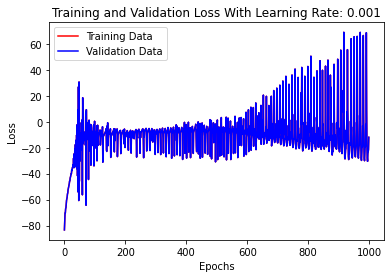

In [3]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
test_pred = np.dot(weights.T, x_test_arr)

test_pred[test_pred < 0] = -1
test_pred[test_pred >= 0] = +1

# Step 8.2 Calculate the Accuracy for Testing Dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(test_pred.flatten(),y_test_arr.flatten()))

# Step 8.3: Calculate the error for Testing dataset
test_pred[test_pred == y_test_arr] = 0
test_cost = -np.sum(np.dot(weights.T, np.multiply(test_pred,x_test_arr)))

0.8055555555555556


## Student Response

In [ ]:
# Step 1 already implemented
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/Mihir2/BreakoutSessionDataset/master/titanic.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

# Step 2 already implemented
import numpy as np
from sklearn.model_selection import train_test_split
output = data['y']
input = data.to_numpy()[:,1:]
x_train, x_val_test, y_train, y_val_test = train_test_split(input, output, test_size = 0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size = 0.5)

# Step 3 already implemented
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc_xtrain = scaler.fit_transform(x_train)
sc_xval = scaler.fit_transform(x_val)
sc_xtest = scaler.transform(x_test)

# Step 4 already implemented
y_train_arr = y_train.to_numpy().reshape(y_train.shape[0],1).T
x_train_arr = sc_xtrain.T
y_val_arr = y_val.to_numpy().reshape(y_val.shape[0],1).T
x_val_arr = sc_xval.T
y_test_arr  = y_test.to_numpy().reshape(y_test.shape[0],1).T
x_test_arr  = sc_xtest.T

# Step 5 already implemented
learningrate = 0.001
epochs = 1000
bias = 0

number_of_features         = x_train_arr.shape[0]
number_of_train_datapoints = x_train_arr.shape[1]
number_of_val_datapoints   = x_val_arr.shape[1]
number_of_test_datapoints  = x_test_arr.shape[1]

weights = np.random.randn(number_of_features,1)

training_cost_track = []
val_cost_track = []

In [ ]:
# Step 6
for epoch in range(epochs):
    
    # Step 6.1 y_pred = g(wT.X + b) (For Training and Validation dataset)
    Z_train = np.dot(weights.T, x_train_arr) + bias
    #bias2=bias[0,0]
    Z_val = np.dot(weights.T, x_val_arr) + bias
    
    y_pred_train = np.where(Z_train<0, -1, 1)
    y_pred_val = np.where(Z_val<0, -1, 1)
    
    # Step 6.2 Perceptron Cost for Training and Validation Dataset
    
    y_pred_train[y_pred_train == y_train_arr] = 0
    
    y_pred_val[y_pred_val == y_train_arr] = 0
    
    train_cost = (-1)*np.sum(np.dot(weights.T, (np.dot(x_train_arr, y_pred_train.T))))
    val_cost = (-1)*np.sum(np.dot(weights.T, (np.dot(x_val_arr, y_pred_val.T))))
    
    # Step 6.3: Calculate derivatives
    dW = (-1)*(np.dot(x_train_arr, y_pred_train.T))
    dB = (-1)*np.sum((y_pred_train))
    
    # Step 6.4: update weights and bias
    weights = weights - learningrate*dW
    bias = bias - learningrate*dB



    # Step 6.5: Store perceptron cost for training and validation in seperate cost tracking list
    training_cost_track.append(train_cost)
    val_cost_track.append(val_cost)

SyntaxError: ignored

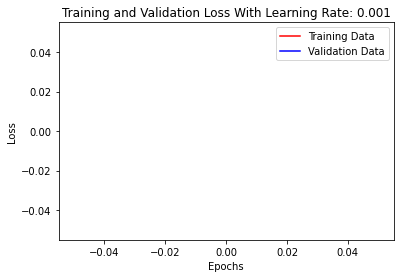

In [ ]:
# Step 7: Plot MSE cost for training and validation set vs number of epochs (Already Implemented)
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss With Learning Rate: ' + str(learningrate))
plt.plot(training_cost_track, color='red', label='Training Data')
plt.plot(val_cost_track, color='blue', label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 8.1: Test using Testing Dataset: Get the predicted values 
from sklearn.metrics import accuracy_score
Z_test = np.dot(weights.T, x_test_arr) + bias
y_pred_test = np.where(Z_test<0, -1, 1)


# Step 8.2 Calculate the Accuracy for Testing Dataset
#print(accuracy_score(y_test_arr, y_pred_test))
#print(y_pred_test.shape)
acc = (100 - np.mean(np.abs(y_test_arr - y_pred_test)))
print(str(acc))
# Step 8.3: Calculate the error for Testing dataset

y_pred_test[y_pred_test == y_test_arr] = 0
test_cost = (-1)*np.sum(np.dot(weights.T, (np.dot(x_test_arr, y_pred_test.T))))
print(test_cost)
